In [1]:
## imports 
import pandas as pd
import numpy as np
import yaml
import plotnine
from plotnine import *

## way to connect to mysql 
import mysql.connector

## function to feed path name to load
## credentials
def load_creds(path: str):
    with open(path, 'r') as stream:
        try:
            creds = yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            print(exc)
    return(creds)


# Preliminary: define connection and read sample of data

In [2]:
creds = load_creds("../private_data/creds_forclass.yaml")

In [3]:
## connect to the database
cnx = mysql.connector.connect(user=creds['practice_database']['db_user'], 
                            password=creds['practice_database']['db_password'],
                            port=creds['practice_database']['port'],
                            database= creds['practice_database']['database'],
                            host = creds['practice_database']['host'])
cnx

In [4]:
print(creds['practice_database'])

{'db_user': 'qss20', 'db_password': 'pZqJ8TEwdinXQOk3', 'port': 3306, 'database': 'rjohnson', 'host': 'rc-db.dartmouth.edu'}


In [26]:
## define a query to pull first 10 rows
## from caseinit table
sample_case_q = """
select * 
from caseinit 
limit 5
"""

In [23]:
## feed read sql query the query
## and my database connection
read_sample_d = pd.read_sql_query(sample_case_q, cnx)

## print columns
print(read_sample_d.columns)
read_sample_d.head()

Index(['CASE_ID', 'CASE_PARTICIPANT_ID', 'RECEIVED_DATE', 'OFFENSE_CATEGORY',
       'PRIMARY_CHARGE_FLAG', 'CHARGE_ID', 'CHARGE_VERSION_ID',
       'CHARGE_OFFENSE_TITLE', 'CHARGE_COUNT', 'CHAPTER', 'ACT', 'SECTION',
       'CLASS', 'AOIC', 'EVENT', 'EVENT_DATE', 'FINDING_NO_PROBABLE_CAUSE',
       'ARRAIGNMENT_DATE', 'BOND_DATE_INITIAL', 'BOND_DATE_CURRENT',
       'BOND_TYPE_INITIAL', 'BOND_TYPE_CURRENT', 'BOND_AMOUNT_INITIAL',
       'BOND_AMOUNT_CURRENT', 'BOND_ELECTRONIC_MONITOR_FLAG_INITIAL',
       'BOND_ELECTROINIC_MONITOR_FLAG_CURRENT', 'AGE_AT_INCIDENT', 'RACE',
       'GENDER', 'INCIDENT_CITY', 'INCIDENT_BEGIN_DATE', 'INCIDENT_END_DATE',
       'LAW_ENFORCEMENT_AGENCY', 'LAW_ENFORCEMENT_UNIT', 'ARREST_DATE',
       'FELONY_REVIEW_DATE', 'FELONY_REVIEW_RESULT',
       'UPDATED_OFFENSE_CATEGORY', 'is_in_diversion'],
      dtype='object')


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,CHARGE_OFFENSE_TITLE,CHARGE_COUNT,CHAPTER,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,UPDATED_OFFENSE_CATEGORY,is_in_diversion
0,403856809175,772672439302,12/14/2013 12:00:00 AM,Retail Theft,True,376264971402,700415450556,RETAIL THEFT,1,720,...,Wheeling,12/14/2013 12:00:00 AM,,WHEELING PD,,12/14/2013 5:04:00 PM,12/14/2013 12:00:00 AM,Approved,Retail Theft,True
1,428224258020,850034064887,12/12/2017 12:00:00 AM,Aggravated Battery Police Officer Firearm,True,419642559930,782745872976,AGGRAVATED BATTERY,1,720,...,Elmwood Park,12/11/2017 12:00:00 AM,,ELMWOOD PARK PD,,12/11/2017 6:29:00 AM,12/12/2017 12:00:00 AM,Approved,Aggravated Battery Police Officer,True
2,408610348048,787586552750,8/27/2014 12:00:00 AM,Narcotics,True,383801260109,714683573367,POSSESSION OF A CONTROLLED SUBSTANCE,1,720,...,Chicago,8/25/2014 12:00:00 AM,,CHICAGO PD,District 9 - Deering,8/25/2014 10:05:00 PM,,,Narcotics,True
3,432664409023,863972841464,9/12/2018 12:00:00 AM,Narcotics,True,427773058046,798230331537,POSSESSION OF A CONTROLLED SUBSTANCE,1,720,...,Chicago,9/5/2018 12:00:00 AM,,CHICAGO PD,District 10 - Ogden,9/5/2018 5:09:00 PM,,,Narcotics,True
4,424815026813,839098495399,3/31/2017 12:00:00 AM,Identity Theft,False,413714945261,771399945421,IDENTITY THEFT,19,720,...,Orland Hills,2/13/2017 12:00:00 AM,,ORLAND PARK PD,,5/8/2017 8:30:00 AM,05/09/2017 12:00:00 AM,Approved,Theft,True


# Row and column filtering

In [7]:
## select specific columns
pull_id_q = """
select CASE_ID, CASE_PARTICIPANT_ID
from caseinit
"""

id_d = pd.read_sql_query(pull_id_q,
                             cnx)
id_d.head()

,CASE_ID,CASE_PARTICIPANT_ID
0,403856809175,772672439302
1,428224258020,850034064887
2,408610348048,787586552750
3,432664409023,863972841464
4,424815026813,839098495399


In [8]:
## select specific rows using where
pull_id_age_q = """
select CASE_ID, CASE_PARTICIPANT_ID, 
AGE_AT_INCIDENT
from caseinit
where AGE_AT_INCIDENT > 40
"""

id_age = pd.read_sql_query(pull_id_age_q,
                cnx)
id_age.head()

,CASE_ID,CASE_PARTICIPANT_ID,AGE_AT_INCIDENT
0,432664409023,863972841464,55.0
1,424815026813,839098495399,52.0
2,430266712796,856516020670,47.0
3,438518623661,881899316106,57.0
4,437742496720,879438088665,50.0


In [10]:
## select specific rows using IN
pull_id_r_q = """
select CASE_ID, CASE_PARTICIPANT_ID, 
RACE
from caseinit
where RACE in ("Black", "HISPANIC")
"""

id_r = pd.read_sql_query(pull_id_r_q,
                cnx)
id_r.RACE.value_counts()

## select specific rows using similarity
pull_id_r_q_2 = """
select CASE_ID, CASE_PARTICIPANT_ID, 
RACE
from caseinit
where RACE like '%Black%'
"""

id_r = pd.read_sql_query(pull_id_r_q_2,
                cnx)
id_r.RACE.value_counts()

Black                               3076
White/Black [Hispanic or Latino]      30
Name: RACE, dtype: int64

In [11]:
## create new col 
## using case when logic
compare_charge_q = """
select *,
CASE 
    WHEN OFFENSE_CATEGORY = UPDATED_OFFENSE_CATEGORY THEN 'Same offense'
    ELSE 'Diff offense'
END charge_update
from caseinit
"""

compare_charge_d = pd.read_sql_query(compare_charge_q, cnx)
compare_charge_d.head()

compare_charge_d.charge_update.value_counts()
samp = compare_charge_d.groupby('charge_update').sample(n = 2, random_state = 919)
samp[['OFFENSE_CATEGORY', 'UPDATED_OFFENSE_CATEGORY', 'charge_update']]

,OFFENSE_CATEGORY,UPDATED_OFFENSE_CATEGORY,charge_update
3516,Aggravated Battery,Aggravated Battery With A Firearm,Diff offense
629,Identity Theft,Theft,Diff offense
2472,Narcotics,Narcotics,Same offense
3958,UUW - Unlawful Use of Weapon,UUW - Unlawful Use of Weapon,Same offense


In [13]:
## create new col 
## using case when logic
## and then row filter
## throws error bc doesn't
## know that charge_update exists
compare_charge_filt_q = """
select *,
CASE 
WHEN OFFENSE_CATEGORY = UPDATED_OFFENSE_CATEGORY THEN 'Same offense'
    ELSE 'Diff offense'
END charge_update
from caseinit
where charge_update = 'Diff offense'
"""

#compare_charge_filt_d = pd.read_sql_query(compare_charge_filt_q, cnx)
#compare_charge_filt_d.head()

In [14]:
## row filtering using equality syntax
compare_charge_q = """
select *
from caseinit
where OFFENSE_CATEGORY <> UPDATED_OFFENSE_CATEGORY
"""

test = pd.read_sql_query(compare_charge_q, cnx)
test[['OFFENSE_CATEGORY', 'UPDATED_OFFENSE_CATEGORY']].head()

,OFFENSE_CATEGORY,UPDATED_OFFENSE_CATEGORY
0,Aggravated Battery Police Officer Firearm,Aggravated Battery Police Officer
1,Identity Theft,Theft
2,Fraud,Credit Card Cases
3,DUI,Aggravated DUI
4,Aggravated Battery,Aggravated Battery Police Officer


# Subqueries and aggregation

## Row filtering using subquery

In [15]:
## row filtering using subquery
compare_charge_sub_q = """
select *
from caseinit
inner join (select CASE_ID as cid, CASE_PARTICIPANT_ID as cpid,
CASE 
    WHEN OFFENSE_CATEGORY = UPDATED_OFFENSE_CATEGORY THEN 'Same offense'
    ELSE 'Diff offense'
END charge_update
from caseinit) as tmp on tmp.cid = caseinit.case_ID and
                        tmp.cpid = caseinit.CASE_PARTICIPANT_ID
where charge_update = "Diff offense"
"""

diff_c = pd.read_sql_query(compare_charge_sub_q, cnx)
diff_c[['OFFENSE_CATEGORY', 'UPDATED_OFFENSE_CATEGORY', 'charge_update']].head()

,OFFENSE_CATEGORY,UPDATED_OFFENSE_CATEGORY,charge_update
0,Aggravated Battery Police Officer Firearm,Aggravated Battery Police Officer,Diff offense
1,Identity Theft,Theft,Diff offense
2,Identity Theft,Theft,Diff offense
3,Fraud,Credit Card Cases,Diff offense
4,DUI,Aggravated DUI,Diff offense


## Longer example: racial disparities in who's offered diversion

-  Find the five most common offenses in the `caseinit` table
- For those five most common offenses, find the percent of Black defendants whose cases are diverted and the percent of White defendants whose cases are diverted
- Create a new column---diff_diversion---that's the White diversion rate for the offense minus the Black diversion rate

In [16]:
## top 5 offenses
t5 = """
select UPDATED_OFFENSE_CATEGORY, count(*) as count_offense
from caseinit
where RACE in ("Black", "White")
group by UPDATED_OFFENSE_CATEGORY
order by count_offense desc
limit 5
"""

t5_d = pd.read_sql_query(t5, cnx)
t5_d

,UPDATED_OFFENSE_CATEGORY,count_offense
0,Narcotics,1610
1,UUW - Unlawful Use of Weapon,487
2,Retail Theft,292
3,Theft,191
4,Identity Theft,117


In [18]:
## filter to rows where UPDATED_OFFENSE_CATEGORY
## is in the top 5
t5_rowfilt = """
select * 
from caseinit
inner join(
select UPDATED_OFFENSE_CATEGORY as tmp_oc, count(*) as count_offense
    from caseinit
    group by UPDATED_OFFENSE_CATEGORY
    order by count_offense desc
    limit 5
    ) as top5 on caseinit.UPDATED_OFFENSE_CATEGORY = top5.tmp_oc
"""

t5_d = pd.read_sql_query(t5_rowfilt, cnx)

t5_d.UPDATED_OFFENSE_CATEGORY.value_counts()


Narcotics                       1941
UUW - Unlawful Use of Weapon     564
Retail Theft                     353
Theft                            228
Aggravated DUI                   217
Name: UPDATED_OFFENSE_CATEGORY, dtype: int64

In [19]:
## get diversion rates by race for white and black
## defendants 
divert_compare = """
select UPDATED_OFFENSE_CATEGORY, 
is_in_diversion, RACE, 
count(*) as count_divert,
count(*)/count_group as prop_divert
from caseinit
inner join (
    select UPDATED_OFFENSE_CATEGORY as tmp_oc, RACE as tmp_race,
    count(*) as count_group 
    from caseinit
    where RACE in ("Black", "White")
    group by UPDATED_OFFENSE_CATEGORY, RACE 
    ) as tmp on tmp.tmp_race = caseinit.RACE
and tmp.tmp_oc = caseinit.UPDATED_OFFENSE_CATEGORY
group by UPDATED_OFFENSE_CATEGORY, RACE,
is_in_diversion 
order by count_divert desc
"""

divert_compare_alloff = pd.read_sql_query(divert_compare, cnx)
divert_compare_alloff.head()


,UPDATED_OFFENSE_CATEGORY,is_in_diversion,RACE,count_divert,prop_divert
0,Narcotics,True,Black,775,0.6822
1,UUW - Unlawful Use of Weapon,False,Black,452,0.9617
2,Narcotics,True,White,414,0.8734
3,Narcotics,False,Black,361,0.3178
4,Retail Theft,True,Black,161,0.8474


In [22]:
## combine with the top 5 filtering code
divert_compare_t5 = """
select UPDATED_OFFENSE_CATEGORY, is_in_diversion, RACE, 
count(*) as count_divert, count(*)/count_group as prop_divert
from caseinit
inner join (
    select UPDATED_OFFENSE_CATEGORY as tmp_oc, RACE as tmp_race,
    count(*) as count_group 
    from caseinit
    where RACE in ("Black", "White")
    group by UPDATED_OFFENSE_CATEGORY, RACE 
    ) as tmp on tmp.tmp_race = caseinit.RACE
    and tmp.tmp_oc = caseinit.UPDATED_OFFENSE_CATEGORY
inner join (
    select UPDATED_OFFENSE_CATEGORY as tmp_oc_t5, count(*) as count_offense
    from caseinit
    where RACE in ("Black", "White") 
    group by UPDATED_OFFENSE_CATEGORY
    order by count_offense desc
    limit 5
    ) as top5 on caseinit.UPDATED_OFFENSE_CATEGORY = top5.tmp_oc_t5
where is_in_diversion = 'True'
group by UPDATED_OFFENSE_CATEGORY, RACE,
is_in_diversion 
"""

divert_compare_t5  = pd.read_sql_query(divert_compare_t5, cnx)
divert_compare_t5


,UPDATED_OFFENSE_CATEGORY,is_in_diversion,RACE,count_divert,prop_divert
0,Identity Theft,True,Black,54,0.5934
1,Identity Theft,True,White,17,0.6538
2,Narcotics,True,Black,775,0.6822
3,Narcotics,True,White,414,0.8734
4,Retail Theft,True,Black,161,0.8474
5,Retail Theft,True,White,89,0.8725
6,Theft,True,Black,87,0.6397
7,Theft,True,White,43,0.7818
8,UUW - Unlawful Use of Weapon,True,Black,18,0.0383
9,UUW - Unlawful Use of Weapon,True,White,2,0.1176


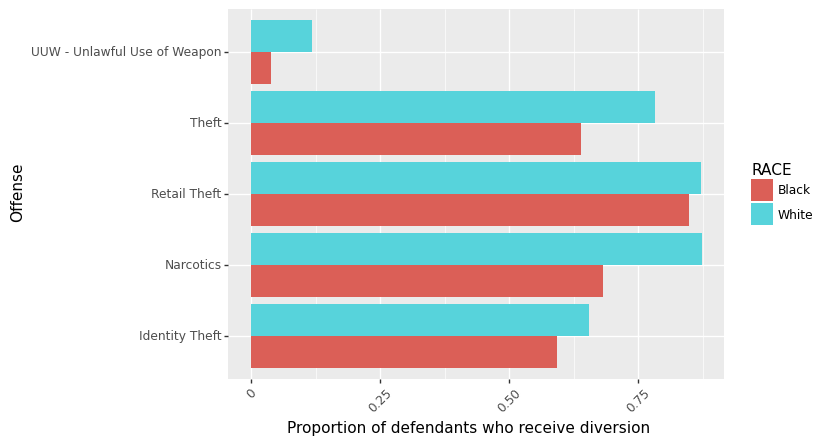

<ggplot: (8775308040141)>

In [21]:
(ggplot(divert_compare_t5, aes(x = 'UPDATED_OFFENSE_CATEGORY', y = 'prop_divert',
                              group = 'RACE', fill = 'RACE')) +
geom_bar(stat = "identity", position = "dodge") +
ylab("Proportion of defendants who receive diversion")+
xlab("Offense") +
theme(axis_text_x = element_text(angle = 45)) +
coord_flip())

# Activity

- Create a new column -- `in_chicago` that takes on the value of "YES" if INCIDENT_CITY = Chicago; "NO" otherwise (which represents incidents in Cook County suburbs outside the city limits)
- Use that column, along with the `is_in_diversion` column, to find the rate of diversions by whether the incident took place in Chicago or the suburbs
- Similarly, find the rate of diversions by city versus suburb and race 
